### Fetal Health Prediction
#### A normal pregnancy lasts 9 months. Each three months period is called trimester. During this 9 months (and 3 trimesters) the fetus grows and gets ready for birth. However, due to various reasons the growth of fetus stops or disturbed. These various reasons may cause disability or mortality of the newborn.

#### One of the main assessment methods of fetal healt is cardiotocagraphy (CTG) which evaluates fetal heart beat and uterine contractions of mother. CTG monitoring is widely used to assess fetal wellbeing by identifying babies at risk of hypoxia (lack of oxygen). CTG is mainly used during labour.

#### In this notebook I will try to build a model to predict whether a fetus is normal, suspicious or problematic with given CTG values.

#### This notebook includes;

#### -Importing Libraries
#### -Loading Data
#### -Exploratory Data Analysis
#### -Machine Learning

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Seaborn is a library for making statistical graphics in Python. 
                      #It builds on top of matplotlib and integrates closely with pandas data structures.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

fh = pd.read_csv(r"C:\Users\abiis\OneDrive\שולחן העבודה\fetal_health.csv")


In [9]:
fh.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


#### 1. Baseline value : The baseline FHR is the heart rate during a 10 min segment rounded to the nearest 5 beat per min increment excluding periods of marked FHR variability, periodic or episodic changes and segments of baseline that differ by more than 25 beats per min (bpm). The minimum baseline duration must be at least 2 min.
#### 2. Accelerations: Accelerations are short-term rises in the heart rate of at least 15 beats per minute above the baseline, lasting at least 15 seconds. Accelerations are normal and healthy. They tell the doctor that the baby has an adequate oxygen supply, which is critical.
#### 3. fetal_movement: It's often called kick counting. It's done by counting the number of kicks you feel from your baby in the uterus in a certain time period.
#### 4.Uterine_contractions: Contractions are used to gauge the activity of labour. Too few contractions indicate labour is not progressing. Too many contractions can mean uterine hyperstimulation, which can lead to fetal compromise.
#### 5. Decelerations: Decelerations are transient episodes of decrease of FHR below the baseline of more than 15 bpm lasting at least 15 seconds 
#### - light_decelerations:
#### - Severe_decelerations:
#### - prolongued_decelerations: Prolonged decelerations are defined as a decrease of FHR below the baseline of more than 15 bpm for longer than 90 seconds but less than 5 minutes.
#### 6. Short term variability (STV):It is the beat-to-beat variation in fetal heart rate. It is the oscillation of the FHR around the baseline in amplitude of 5 to 10 bpm.Low fetal heart rate short term variation (STV) is predictive for hypoxia during the antenatal period.

#### - abnormal_short_term_variability
#### - mean_value_of_short_term_variability
#### 7.Long term variability: Long-term variability is a somewhat slower oscillation in heart rate and has a frequency of three to 10 cycles per minute and an amplitude of 10 to 25 bpm.

#### - percentage_of_time_with_abnormal_long_term_variability
#### - mean_value_of_long_term_variability

#### The rest of the histogram columns (we are assuming) probably don't bear any value or significance to our data since there was no mention of them on the original source page of this data , so we will not be visualising their relationship with the target variable Fetal health in this notebook.

In [10]:
fh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

#### as we can see there are no null valus in the table
#### we have 21 colomns and there type is 'float'
#### we habe 2126 rows


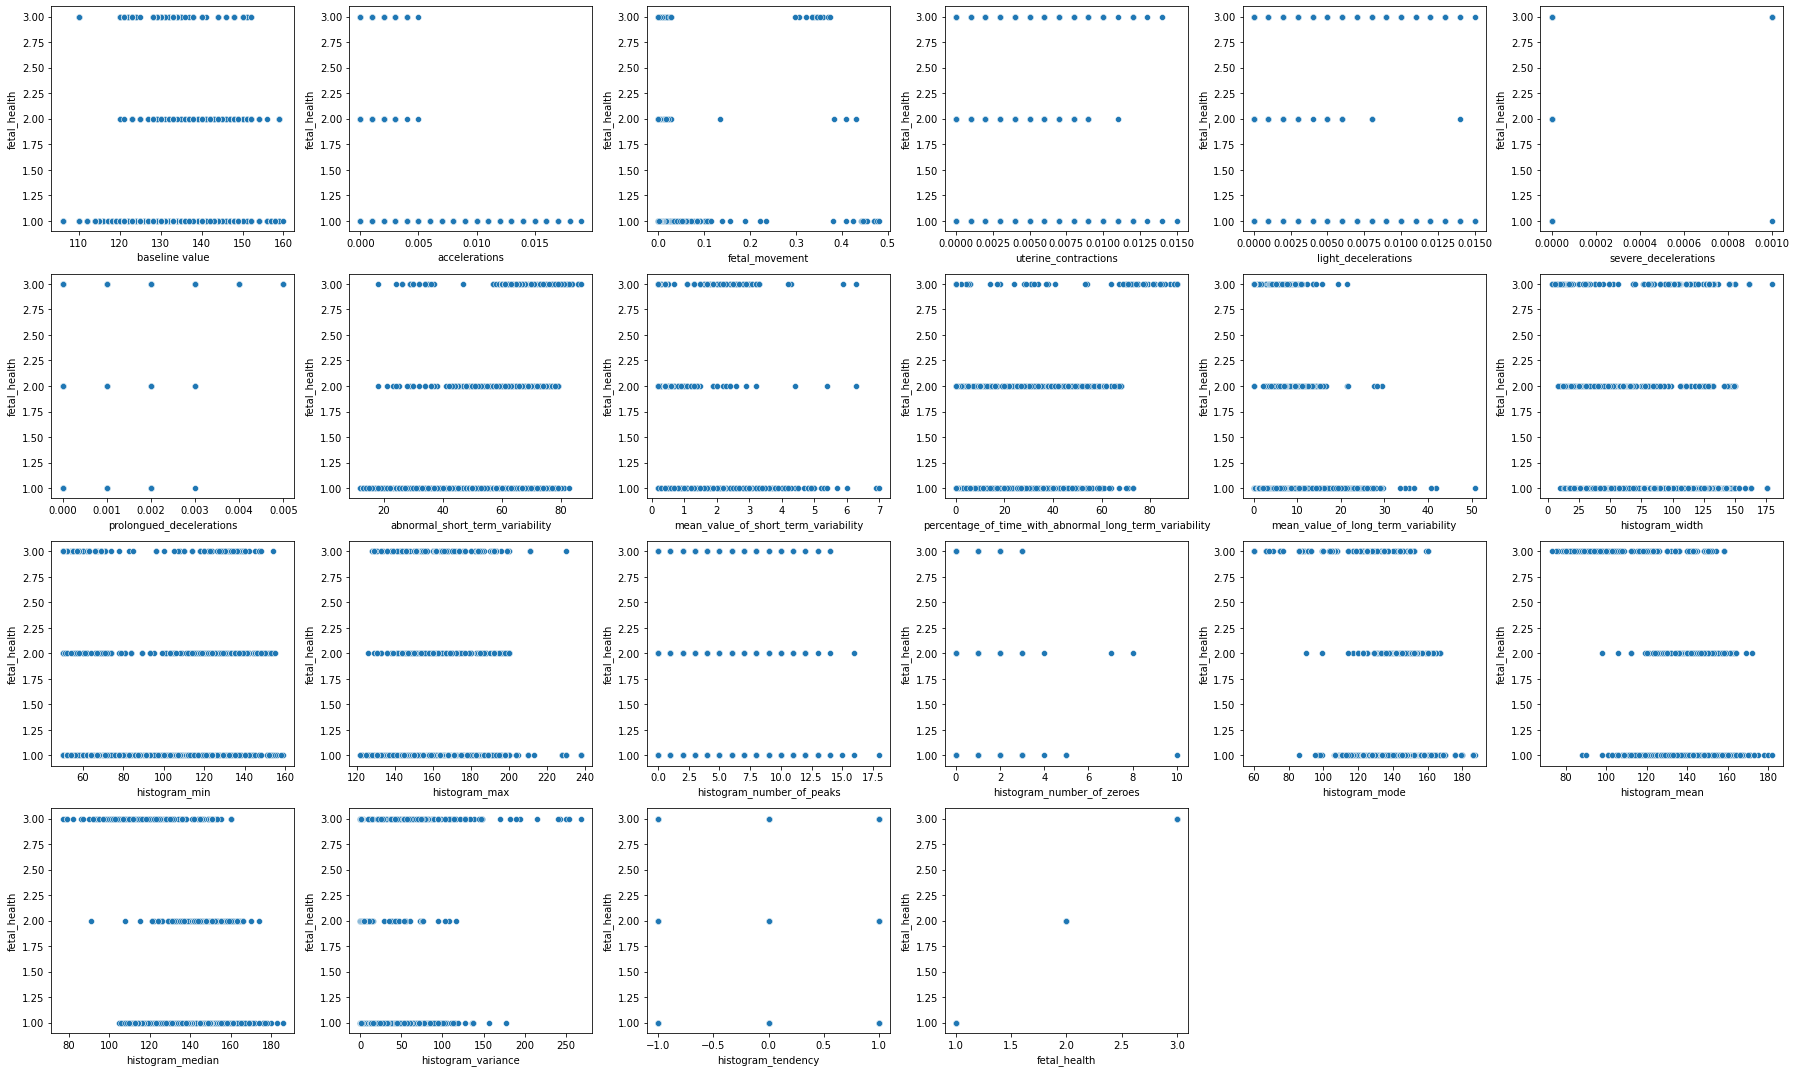

In [11]:
plt.figure(figsize=(25, 15))

for i, column in enumerate(fh.columns):
    plt.subplot(4, 6, i + 1)
    sns.scatterplot(data = fh, x = fh[column], y = "fetal_health")
    
    
plt.tight_layout()
plt.show()

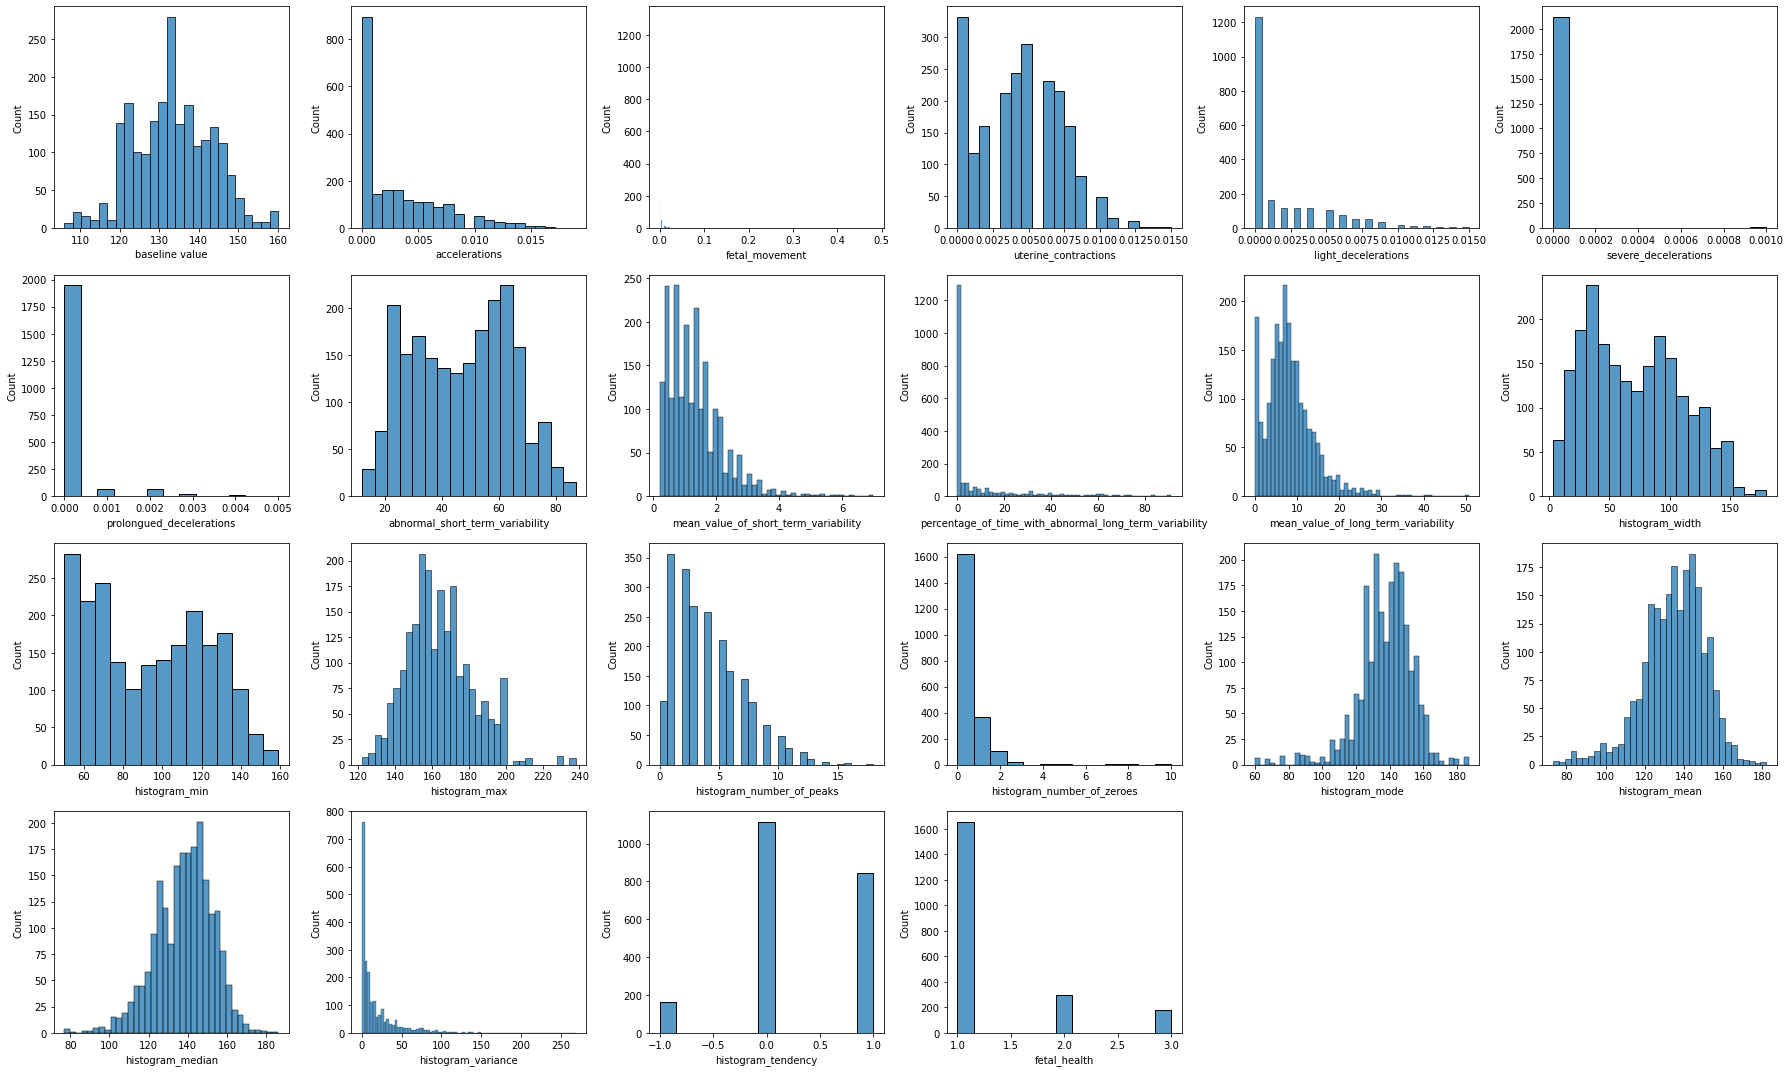

In [12]:
plt.figure(figsize=(25, 15))

for i, column in enumerate(fh.columns):
    plt.subplot(4, 6, i + 1)
    sns.histplot(data=fh[column])
    
plt.tight_layout()
plt.show()

#### Correlation of features

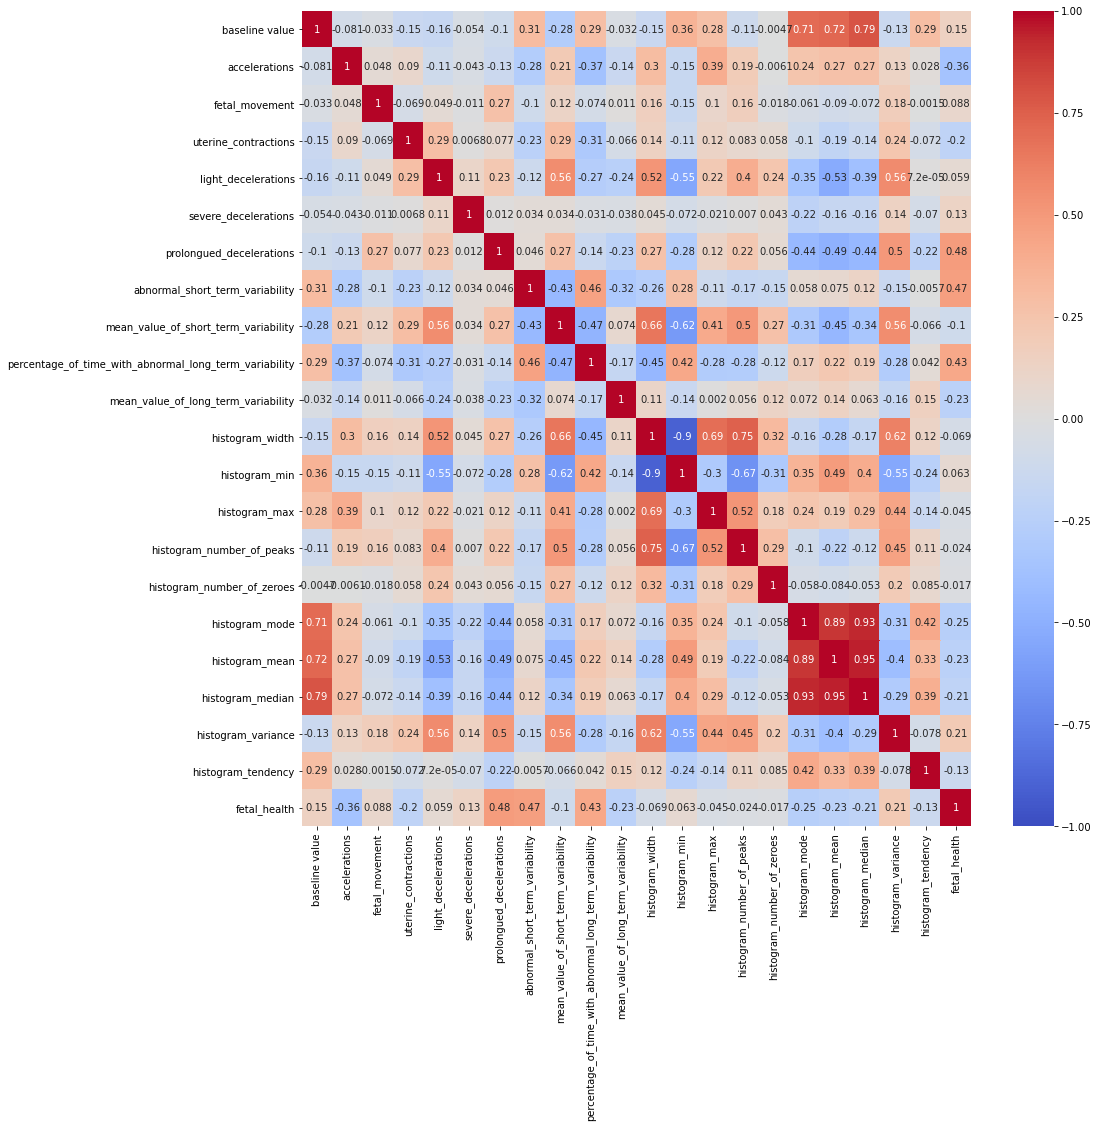

In [13]:
corr = fh.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

In [14]:
corr[abs(corr['fetal_health']) > 0.3]['fetal_health']

accelerations                                            -0.364066
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
fetal_health                                              1.000000
Name: fetal_health, dtype: float64

### 

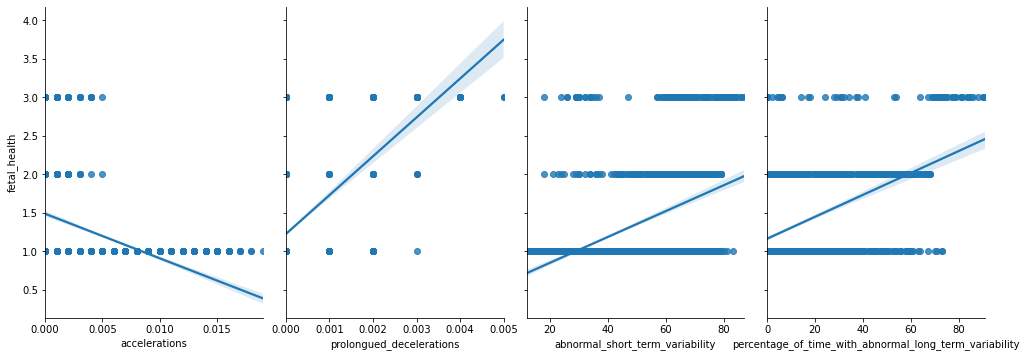

#### Looking for outliers in the data

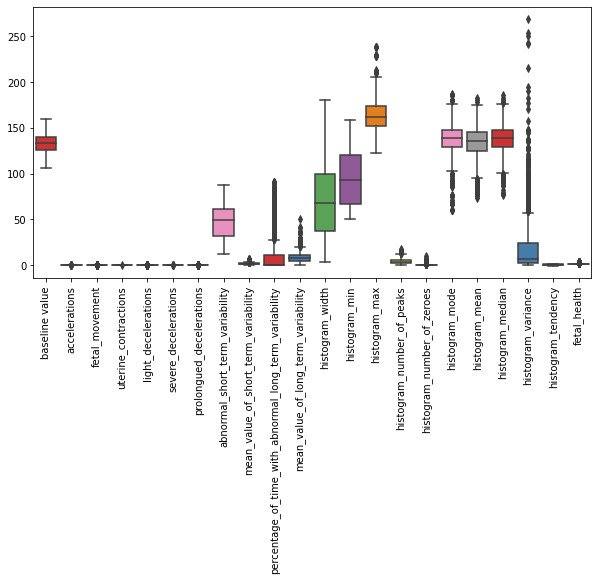

In [39]:
plt.figure(figsize=(10,5))
sns.boxplot(data = fh,palette = "Set1")
plt.xticks(rotation=90)
plt.show()

#### let's check if our data is balanced 

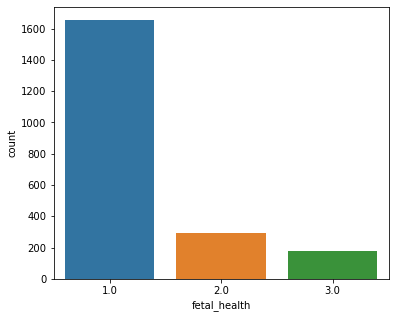

In [40]:
plt.figure(figsize=(6,5))
ax = sns.countplot(x = fh['fetal_health'])

#### We want to pradict the fetal helth but as we can see we have implance data, so we have to take this in our consideration going forword.

### train test split:

In [41]:
#x= data
#y=target(fetal_health)
X = fh.drop("fetal_health", axis=1)
y = fh["fetal_health"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [42]:
X_train.shape, X_test.shape

((1488, 21), (638, 21))

In [43]:
df_train_x = pd.DataFrame(X_train)

df_train_y = pd.DataFrame(y_train)

df_train = pd.concat([df_train_x, df_train_y], axis=1, join="inner")

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1488 entries, 1178 to 1061
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          1488 non-null   float64
 1   accelerations                                           1488 non-null   float64
 2   fetal_movement                                          1488 non-null   float64
 3   uterine_contractions                                    1488 non-null   float64
 4   light_decelerations                                     1488 non-null   float64
 5   severe_decelerations                                    1488 non-null   float64
 6   prolongued_decelerations                                1488 non-null   float64
 7   abnormal_short_term_variability                         1488 non-null   float64
 8   mean_value_of_short_term_variabilit

### syntethik data

In [44]:
from sklearn.utils import resample

# Separate Target Classes
df_1 = df_train[df_train.fetal_health==1]
df_2 = df_train[df_train.fetal_health==2]
df_3 = df_train[df_train.fetal_health==3]
 
# Upsample minority class
df_2_upsampled = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=1165,    # to match majority class
                                 random_state=2) # reproducible results

df_3_upsampled = resample(df_3, 
                                 replace=True,     # sample with replacement
                                 n_samples=1165,    # to match majority class
                                 random_state=2) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_1, df_2_upsampled, df_3_upsampled])
 
# Display new class counts
df_upsampled.fetal_health.value_counts()

2.0    1165
1.0    1165
3.0    1165
Name: fetal_health, dtype: int64

In [45]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3495 entries, 1178 to 1686
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          3495 non-null   float64
 1   accelerations                                           3495 non-null   float64
 2   fetal_movement                                          3495 non-null   float64
 3   uterine_contractions                                    3495 non-null   float64
 4   light_decelerations                                     3495 non-null   float64
 5   severe_decelerations                                    3495 non-null   float64
 6   prolongued_decelerations                                3495 non-null   float64
 7   abnormal_short_term_variability                         3495 non-null   float64
 8   mean_value_of_short_term_variabilit

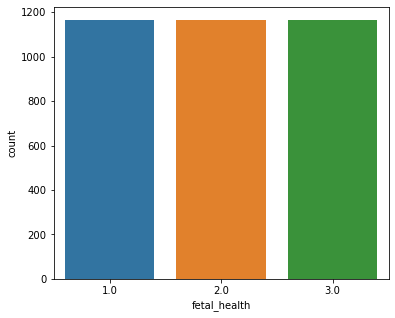

In [46]:

plt.figure(figsize=(6,5))
ax = sns.countplot(x = df_upsampled['fetal_health'])

#### To balance the data resampling was done by up_sampling i.e, duplicating the minority class to meet the value_count of majority class.

### dummy model

In [47]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_train, y_train)

0.7829301075268817

### scaling the tada
#### The standard score of a sample x is calculated as:
#### z = (x - u) / s
#### where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples #### or one if with_std=False.

In [48]:

X_ = df_upsampled.drop("fetal_health", axis=1)
y_train = df_upsampled["fetal_health"]

scaler = StandardScaler() 

X_train_scaled = scaler.fit_transform(X_)
X_test_scaled = scaler.fit_transform(X_test)


### knn model
#### 1. fined optymal k

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
# search for an optimal value of K for KNN
k_range = list(range(1, 100))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.9845501432664758, 0.9799688907081459, 0.9713835448219404, 0.9685247646336471, 0.957652067130577, 0.9513565288579615, 0.9442046663937781, 0.9450601719197709, 0.9373295128939828, 0.9333254195661074, 0.9276086778550962, 0.9256086778550963, 0.9193139582480556, 0.9173115022513304, 0.9135914858780187, 0.9075841178878429, 0.9055800245599672, 0.9055800245599673, 0.9050085959885387, 0.9018624641833812, 0.8995751125665166, 0.9001489971346706, 0.8981465411379451, 0.9001489971346706, 0.8984281620957839, 0.896422431436758, 0.896138354482194, 0.8992877609496521, 0.8990004093327875, 0.8987138763814981, 0.8995693819074907, 0.9001432664756447, 0.8975693819074907, 0.8972828489562014, 0.8964240687679084, 0.8952762996316006, 0.8935603765861645, 0.8981416291444944, 0.8941326238231682, 0.8944224314367581, 0.8927065083913222, 0.8907032337290216, 0.8912762996316005, 0.8886975030699957, 0.8869791240278346, 0.8878362668849776, 0.887264838313549, 0.88898158002456, 0.8858346295538272, 0.8864060581252557, 0.881

Text(0, 0.5, 'Cross-Validated Accuracy')

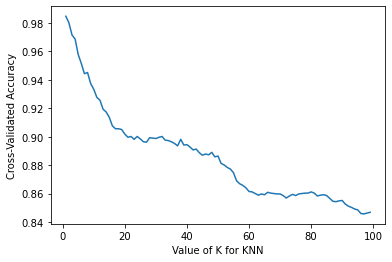

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [104]:
k_scores.index(max(k_scores))

13

### k=14

In [106]:
knn = KNeighborsClassifier(n_neighbors=14)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.8475529276286651
